# Complements on boundary conditions, dataset, epsilon

This notebook looks at the influence of three factors:

* the boundary conditions used in the convolutional layers
* the input dataset
* the fuzz factor $\epsilon$ of batch normalization

The number of realizations is reduced to `num_realizations = 200` for reasons of computing time. This has the effect of making the curves slightly more noisy, but it is already enough to gain insights.

## Influence of boundary conditions for vanilla nets

These two experiments share the same parameters as Fig. $3$ except for `boundary = 'symmetric'`  in the first experiment and `boundary = 'zero_padding'` in the second experiment:

* In the case of symmetric boundary conditions, there is a fully equivalent behaviour to Fig. $3$ with $\delta \chi^l \to 1$ and the convergence to the pathology of one-dimension signal:  $r_\text{eff}(\mathbf{x}^l) \to 1$

* In the case of zero-padding boundary conditions, there is an equivalent behaviour of the normalized sensitivity with  $\delta \chi^l \to 1$. However the effective rank $r_\text{eff}(\mathbf{x}^l)$ does not converge to $1$ but rather to a value close to $2$. With periodic or symmetric boundary conditions the signal becomes homogeneous with respect to the spatial position $\alpha$ so that the receptive fields remain one-dimensional. This mechanism, however, is hindered when zeros are padded. Indeed a constant spatial value appears in the receptive field vector together with a number of zeros which varies depending on how close the receptive field is to the border. These semi-padded receptive fields create new directions of variance in $r_\text{eff}(\mathbf{x}^l)$.

In [ ]:
from run_experiment import run_experiment
from manage_experiments import prune_experiment

# these computations ran in the cloud, but they are left here to show the function calls
run_experiment(architecture='vanilla', total_depth=200, kernel_size=3, num_channels=512, 
               boundary='symmetric', dataset='cifar10',
               batch_size=64, num_realizations=200, name_experiment='vanilla_symmetric', 
               compute_reff_signal=True, compute_reff_noise=False, verbose=True)

run_experiment(architecture='vanilla', total_depth=200, kernel_size=3, num_channels=512, 
               boundary='zero_padding', dataset='cifar10',
               batch_size=64, num_realizations=200, name_experiment='vanilla_zero_padding', 
               compute_reff_signal=True, compute_reff_noise=False, verbose=True)

# in the npy/ folder, only the moments relevant for the plots are kept in order to limit disk space
prune_experiment(type_plot='vanilla', name_experiment='vanilla_symmetric')
prune_experiment(type_plot='vanilla', name_experiment='vanilla_zero_padding')

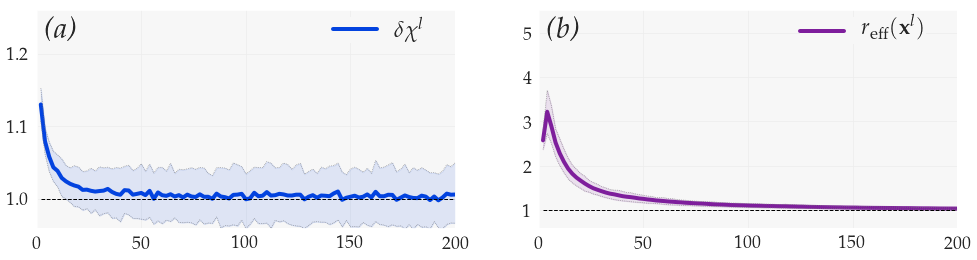

In [10]:
from manage_experiments import load_experiment
from plots import plot_vanilla
%matplotlib inline

moments_vanilla = load_experiment('vanilla_symmetric')
plot_vanilla(moments_vanilla, use_tex=True, name_fig=None)

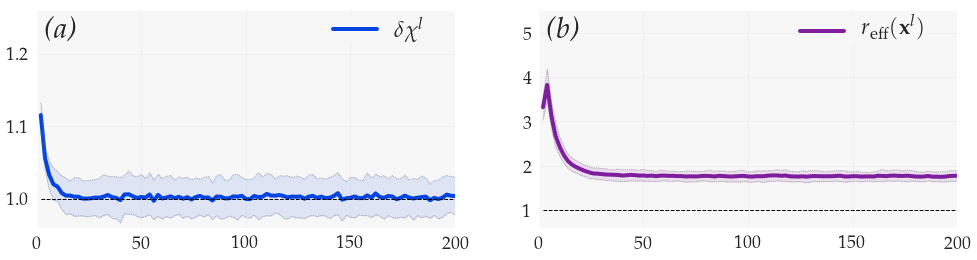

In [18]:
from manage_experiments import load_experiment
from plots import plot_BN_FF
%matplotlib inline

moments_vanilla = load_experiment('vanilla_zero_padding')
plot_vanilla(moments_vanilla, use_tex=True, name_fig=None)

*In the remaining experiments, only batch-normalized feedforward nets are considered since the evolution of batch-normalized resnets is simply obtained as the logarithmic version of the evolution of batch-normalized feedforward nets, implying that all reasonings can be transposed.*

## Influence of boundary conditions for batch-normalized feedforward nets

This experiment shares the same parameters as Fig. $4$ except for `boundary = 'zero_padding'`. In this case, zero-padding conditions lead to results extremely similar to Fig. $4$.

In [ ]:
from run_experiment import run_experiment
from manage_experiments import prune_experiment

# this computation ran in the cloud, but it is left here to show the function call
run_experiment(architecture='BN_FF', total_depth=200, kernel_size=3, num_channels=512, 
               boundary='zero_padding', dataset='cifar10',
               batch_size=64, num_realizations=200, name_experiment='BN_FF_zero_padding', 
               compute_reff_signal=True, compute_reff_noise=True, verbose=True)

# in the npy/ folder, only the moments relevant for the plots are kept in order to limit disk space
prune_experiment(type_plot='BN_FF', name_experiment='BN_FF_zero_padding')

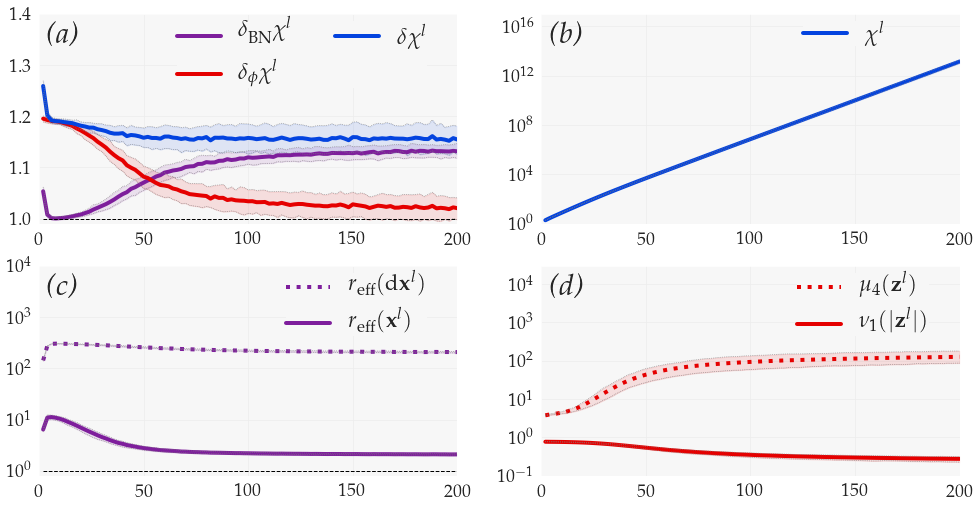

In [14]:
from manage_experiments import load_experiment
from plots import plot_BN_FF
%matplotlib inline

moments_BN_FF = load_experiment('BN_FF_zero_padding')
plot_BN_FF(moments_BN_FF, use_tex=True, name_fig=None)

## Influence of input dataset

This experiment shares the same parameters as Fig. $4$ except for `dataset = 'mnist'`. 

There is now a slight difference at very low depth. Indeed the kurtosis of the signal $\mu_4(\mathbf{z}^l)$ is higher, resulting in lower $\delta_\phi \chi^l$. This is presumably due to the fact that $\operatorname{MNIST}$ is more fat-tailed than $\operatorname{CIFAR-10}$, which seems reasonable.

The evolution still becomes equivalent again to Fig. $4$ at higher depth.

In [ ]:
from run_experiment import run_experiment
from manage_experiments import prune_experiment

# this computation ran in the cloud, but it is left here to show the function call
run_experiment(architecture='BN_FF', total_depth=200, kernel_size=3, num_channels=512, 
               boundary='periodic', dataset='mnist',
               batch_size=64, num_realizations=200, name_experiment='BN_FF_mnist', 
               compute_reff_signal=True, compute_reff_noise=True, verbose=True)

# in the npy/ folder, only the moments relevant for the plots are kept in order to limit disk space
prune_experiment(type_plot='BN_FF', name_experiment='BN_FF_mnist')

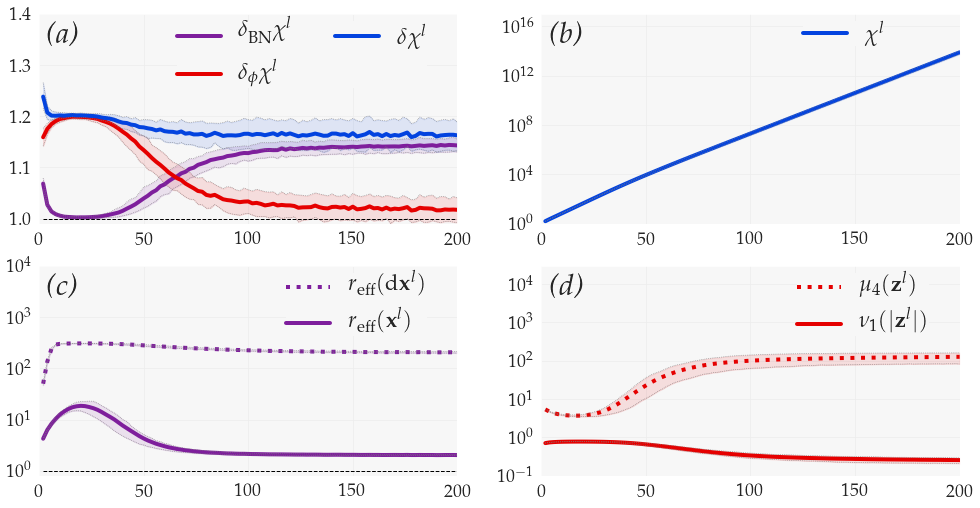

In [5]:
from main import load_experiment
from plots import plot_BN_FF
%matplotlib inline

moments_BN_FF = load_experiment('BN_FF_mnist')
plot_BN_FF(moments_BN_FF, use_tex=True, name_fig=None)

## Influence of $\epsilon$

Finally this experiment shares the same parameters as Fig. $4$ except for `epsilon = 0.` instead of `epsilon = 0.001`. The results are undistinguishable from Fig. $4$, meaning that $\epsilon$ has negligible impact as long as it is small.

In [ ]:
from run_experiment import run_experiment
from manage_experiments import prune_experiment

# this computation ran in the cloud, but it is left here to show the function call
run_experiment(architecture='BN_FF', total_depth=200, kernel_size=3, num_channels=512, 
               boundary='periodic', dataset='cifar10', epsilon=0.,
               batch_size=64, num_realizations=200, name_experiment='BN_FF_epsilon', 
               compute_reff_signal=True, compute_reff_noise=True, verbose=True)

# in the npy/ folder, only the moments relevant for the plots are kept in order to limit disk space
prune_experiment(type_plot='BN_FF', name_experiment='BN_FF_epsilon')

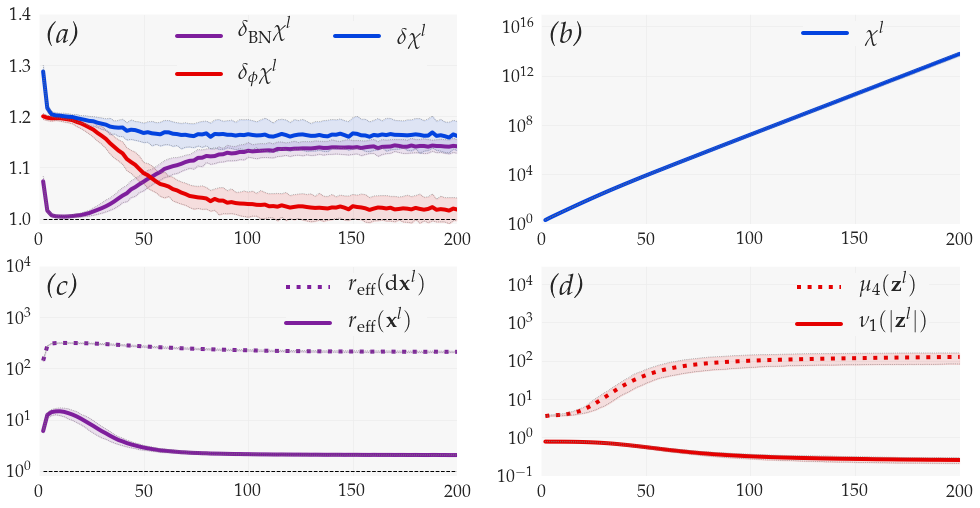

In [6]:
from manage_experiments import load_experiment
from plots import plot_BN_FF
%matplotlib inline

moments_BN_FF = load_experiment('BN_FF_epsilon')
plot_BN_FF(moments_BN_FF, use_tex=True, name_fig=None)